In [25]:
import json
import io
import os
from collections import Counter
from operator import itemgetter

import numpy as np
import pandas as pd
import seaborn as sns
from fasttext import FastText
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [2]:
ft_ru = FastText.load_model('cc.ru.300.bin')

In [3]:
with io.open(os.path.join(os.getcwd(), 'data', 'habr-favorites.json'), encoding='utf-8') as fp:
    data_ru = json.load(fp)

In [4]:
len(data_ru)

4732

In [5]:
data_ru[0].keys()

dict_keys(['title', 'preview', 'article', 'tags', 'link', 'user'])

In [6]:
df_v = pd.DataFrame(data_ru)

In [7]:
df_v.head()

,title,preview,article,tags,link,user
0,Переписка со спамерами: избранное,"Конец XIV века, неизвестный автор: Комиссия ФА...","Конец XIV века, неизвестный автор: Комиссия ФА...",[Спам и антиспам],https://habr.com/ru/post/580906/,ne555
1,Геоаналитика с помощью Python и открытых данны...,"Геоаналитика с помощью Python: GeoPandas, foli...","Каждый бизнес желает знать, где сидит фазан це...","[Python *, OpenStreetMap *, Геоинформацион...",https://habr.com/ru/post/579838/,ne555
2,Умный дом в квартире,Пробую создать умный дом в квартире на програм...,Пробую создать умный дом в квартире на програм...,"[Разработка на Raspberry Pi *, Умный дом]",https://habr.com/ru/post/577382/,ne555
3,Ventoy. Мультизагрузочная флешка,"Мультизагрузочная флешка, сколько раз она меня...",Так выглядит загрузочный интерфейс Ventoy Утил...,[Софт],https://habr.com/ru/post/575642/,ne555
4,Упавшие с бомбами: аварии и катастрофы самолет...,"Ядерное оружие - это добро. Но только, когда о...",Ядерное оружие - это добро. Но только когда он...,"[Читальный зал, Научно-популярное, Энергия и э...",https://habr.com/ru/post/570344/,ne555


In [8]:
df_vector = []
for idx, row in df_v.iterrows():
    df_vector.append(ft_ru.get_word_vector(row.article))
df_vector = pd.DataFrame(df_vector)

In [9]:
vector2 = TSNE(n_components=2, perplexity=3).fit_transform(df_vector.values)

In [10]:
df_v['tsne_x'] = vector2[:, 0]
df_v['tsne_y'] = vector2[:, 1]

In [11]:
for c in ['x', 'y']:
    minc = df_v[f'tsne_{c}'].min()
    maxc = df_v[f'tsne_{c}'].max()
    df_v[f'{c}'] = (df_v[f'tsne_{c}'] - minc) / (maxc - minc)

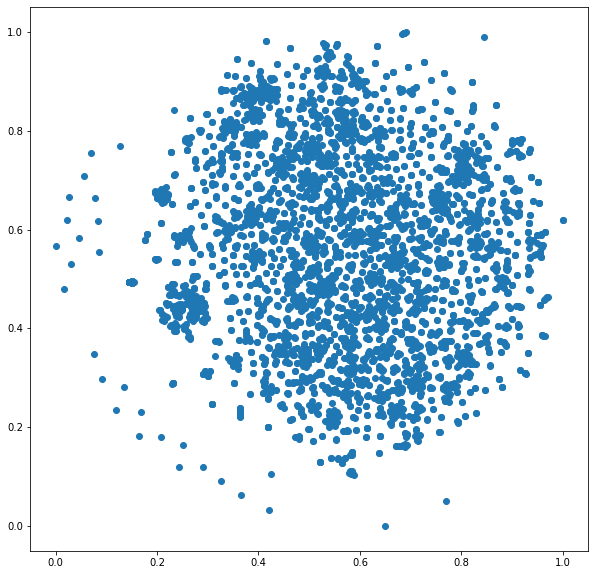

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(df_v.x, df_v.y)
plt.show()

In [13]:
clustering = DBSCAN(eps=0.01, min_samples=3).fit(df_v[['x', 'y']].values)

In [15]:
counter = Counter(clustering.labels_)
for cl, cnt in sorted(counter.items(), key=itemgetter(1), reverse=True):
    print(f'{cl}\t{cnt}')

-1	519
42	92
443	89
0	71
83	60
110	54
144	51
43	41
65	40
64	39
153	38
152	37
85	34
188	34
374	34
120	33
53	32
165	32
133	31
237	31
167	30
182	30
102	29
179	29
39	28
124	28
131	28
270	28
88	27
96	26
246	26
49	25
97	25
148	25
154	25
171	25
54	24
55	23
163	23
75	22
7	21
127	21
129	21
290	21
10	20
51	20
78	20
109	20
2	19
67	19
81	19
100	19
247	19
86	18
95	18
241	18
354	18
17	17
37	17
48	17
74	17
93	17
157	17
251	17
113	16
181	16
184	16
265	16
325	16
111	15
183	15
287	15
6	14
215	14
248	14
256	14
288	14
349	14
44	13
60	13
62	13
106	13
302	13
447	13
38	12
70	12
132	12
187	12
217	12
225	12
253	12
299	12
1	11
32	11
69	11
79	11
82	11
99	11
117	11
146	11
150	11
208	11
304	11
313	11
314	11
444	11
445	11
76	10
91	10
101	10
105	10
115	10
147	10
151	10
176	10
178	10
197	10
218	10
277	10
308	10
322	10
327	10
347	10
386	10
415	10
19	9
25	9
47	9
71	9
73	9
84	9
114	9
118	9
121	9
126	9
199	9
224	9
249	9
263	9
264	9
275	9
281	9
284	9
296	9
316	9
379	9
409	9
426	9
452	9
8	8
14	8
57	8
58	8
61	8
72	8
90	8
11

In [16]:
df_v['dbscan2'] = clustering.labels_

In [24]:
df_v[df_v.dbscan2 == 3]

,title,preview,article,tags,link,user,tsne_x,tsne_y,x,y,dbscan2
5,Бесплатно или хотя бы недорого — где взять муз...,В одном из прошлых материалов мы рассказали о ...,В одном из прошлых материалов мы рассказали о ...,"[Блог компании Аудиомания, Работа с видео *,...",https://habr.com/ru/company/audiomania/blog/56...,ne555,19.466024,-41.990673,0.658983,0.375631,3
1618,Музыка операционных систем: как стандартные зв...,Ранее мы уже рассказывали о музыке «зашитой» в...,Ранее мы уже рассказывали о музыке «зашитой» в...,"[Блог компании Аудиомания, История IT, Софт, З...",https://habr.com/ru/company/audiomania/blog/56...,pronskiy,18.980280,-43.325127,0.656876,0.369768,3
2498,«На любой вкус»: стриминговые сервисы для прос...,Музыкальные стриминговые сервисы наращивают по...,Музыкальные стриминговые сервисы наращивают по...,"[Блог компании Аудиомания, Управление e-commer...",https://habr.com/ru/company/audiomania/blog/37...,Belisckner,20.516933,-41.222588,0.663543,0.379006,3
3443,Где взять аудиосемплы для ваших проектов: подб...,В прошлый раз мы делали подборку ресурсов с по...,В прошлый раз мы делали подборку ресурсов с по...,"[Блог компании Аудиомания, Работа с видео *,...",https://habr.com/ru/company/audiomania/blog/45...,Refridgerator,19.594240,-41.990543,0.659540,0.375632,3
4358,Spotify призвала антимонопольщиков расследоват...,"Согласно информации Verge и MacRumors , Spotif...","Согласно информации Verge и MacRumors , Spotif...","[Гаджеты, Смартфоны, IT-компании]",https://habr.com/ru/news/t/519328/,AlfaTeam,20.508923,-40.832504,0.663508,0.380720,3
4372,Spotify официально подтвердил запуск сервиса в...,Стриминговый музыкальный сервис Spotify обнови...,Стриминговый музыкальный сервис Spotify официа...,"[Социальные сети и сообщества, Звук, IT-компании]",https://habr.com/ru/news/t/510962/,AlfaTeam,20.914387,-41.343163,0.665267,0.378476,3


In [18]:
clusters = df_v.dbscan2.unique()
n_clusters = len(clusters)

In [21]:
colors = sns.color_palette('husl', n_clusters)

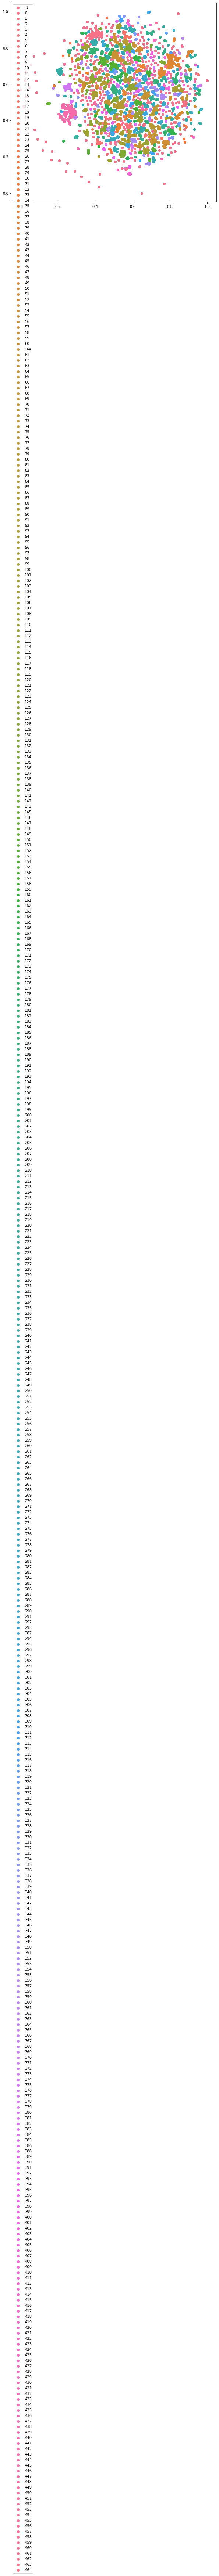

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(df_v.x, df_v.y)

for i, cl in enumerate(clusters):
    idx = df_v[df_v['dbscan2'] == cl].index
    ax.scatter(df_v.loc[idx, 'x'], df_v.loc[idx, 'y'], color=colors[i], label=f'{cl}')

ax.legend()
plt.show()